Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking
using CmdStan, StanMCMCChain
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "chapters", "04")
cd(ProjDir)

### Preliminary snippets

In [3]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);

Use only adults

In [4]:
df2 = filter(row -> row[:age] >= 18, df);

Center weight and store as weight_c

In [5]:
mean_weight = mean(df2[:weight])
df2 = hcat(df2, df2[:weight] .- mean_weight)
rename!(df2, :x1 => :weight_c); # Rename our col :x1 => :weight_c
df2

352×5 DataFrame
│ Row │ height   │ weight   │ age      │ male   │ weight_c │
│     │ Float64⍰ │ Float64⍰ │ Float64⍰ │ Int64⍰ │ Float64  │
├─────┼──────────┼──────────┼──────────┼────────┼──────────┤
│ 1   │ 151.765  │ 47.8256  │ 63.0     │ 1      │ 2.83512  │
│ 2   │ 139.7    │ 36.4858  │ 63.0     │ 0      │ -8.50468 │
│ 3   │ 136.525  │ 31.8648  │ 65.0     │ 0      │ -13.1256 │
│ 4   │ 156.845  │ 53.0419  │ 41.0     │ 1      │ 8.05143  │
│ 5   │ 145.415  │ 41.2769  │ 51.0     │ 0      │ -3.71361 │
│ 6   │ 163.83   │ 62.9926  │ 35.0     │ 1      │ 18.0021  │
│ 7   │ 149.225  │ 38.2435  │ 32.0     │ 0      │ -6.74701 │
⋮
│ 345 │ 146.05   │ 39.4058  │ 37.4     │ 0      │ -5.58468 │
│ 346 │ 156.21   │ 41.0501  │ 53.0     │ 1      │ -3.94041 │
│ 347 │ 152.4    │ 40.8233  │ 49.0     │ 0      │ -4.16721 │
│ 348 │ 162.56   │ 47.0318  │ 27.0     │ 0      │ 2.04133  │
│ 349 │ 142.875  │ 34.2462  │ 31.0     │ 0      │ -10.7443 │
│ 350 │ 162.56   │ 52.1631  │ 31.0     │ 1      │ 7.17259  │
│ 351 │ 156.21   │ 54.0625  │ 21.0     │ 0      │ 9.07201  │
│ 352 │ 158.75   │ 52.5316  │ 68.0     │ 1      │ 7.54114  │

Define the Stan language model

In [6]:
weightsmodel = "
data {
 int < lower = 1 > N; // Sample size
 vector[N] height; // Predictor
 vector[N] weight; // Outcome
}

parameters {
 real alpha; // Intercept
 real beta; // Slope (regression coefficients)
 real < lower = 0 > sigma; // Error SD
}

model {
 height ~ normal(alpha + weight * beta , sigma);
}
";

Define the Stanmodel and set the output format to :mcmcchain.

In [7]:
stanmodel = Stanmodel(name="weights", monitors = ["alpha", "beta", "sigma"],model=weightsmodel,
  output_format=:mcmcchain);
# Input data for cmdstan.
heightsdata = [
  Dict("N" => length(df2[:height]), "height" => df2[:height], "weight" => df2[:weight_c])
];

=====> /Users/rob/.julia/dev/StatisticalRethinking/chapters/04


File /Users/rob/.julia/dev/StatisticalRethinking/chapters/04/tmp/weights.stan will be updated.



Sample using cmdstan

In [8]:
rc, chn, cnames = stan(stanmodel, heightsdata, ProjDir, diagnostics=false,
  CmdStanDir=CMDSTAN_HOME);
# ### Snippet 4.47
# Show first 5 individual draws of correlated parameter values in chain 1
chn.value[1:5,:,1]



--- Translating Stan model to C++ code ---
bin/stanc  /Users/rob/.julia/dev/StatisticalRethinking/chapters/04/tmp/weights.stan --o=/Users/rob/.julia/dev/StatisticalRethinking/chapters/04/tmp/weights.hpp
Model name=weights_model
Input file=/Users/rob/.julia/dev/StatisticalRethinking/chapters/04/tmp/weights.stan
Output file=/Users/rob/.julia/dev/StatisticalRethinking/chapters/04/tmp/weights.hpp

--- Linking C++ model ---
clang++ -Wall -I . -isystem stan/lib/stan_math/lib/eigen_3.3.3 -isystem stan/lib/stan_math/lib/boost_1.66.0 -isystem stan/lib/stan_math/lib/sundials_3.1.0/include -std=c++1y -DBOOST_RESULT_OF_USE_TR1 -DBOOST_NO_DECLTYPE -DBOOST_DISABLE_ASSERTS -DBOOST_PHOENIX_NO_VARIADIC_EXPRESSION -Wno-unused-function -Wno-uninitialized -I src -isystem stan/src -isystem stan/lib/stan_math/ -DFUSION_MAX_VECTOR_SIZE=12 -Wno-unused-local-typedefs -DEIGEN_NO_DEBUG -DNO_FPRINTF_OUTPUT -pipe   src/cmdstan/main.cpp  -O3 -o /Users/rob/.julia/dev/StatisticalRethinking/chapters/04/tmp/weights -

5×3 Array{Union{Missing, Float64},2}:
 154.151  0.898689  5.12014
 154.506  0.905601  5.21116
 154.176  0.87339   4.86632
 154.176  0.87339   4.86632
 154.689  0.859142  5.2971 

### Snippets 4.48 & 4.49

Plot estimates using the N = [10, 50, 150, 352] observations

In [9]:
nvals = [10, 50, 150, 352];

Create the 4 nvals plots


make: `/Users/rob/.julia/dev/StatisticalRethinking/chapters/04/tmp/weights' is up to date.

Length of data array is not equal to nchains,
all chains will use the first data dictionary.

make: `/Users/rob/.julia/dev/StatisticalRethinking/chapters/04/tmp/weights' is up to date.

Length of data array is not equal to nchains,
all chains will use the first data dictionary.

make: `/Users/rob/.julia/dev/StatisticalRethinking/chapters/04/tmp/weights' is up to date.

Length of data array is not equal to nchains,
all chains will use the first data dictionary.

make: `/Users/rob/.julia/dev/StatisticalRethinking/chapters/04/tmp/weights' is up to date.

Length of data array is not equal to nchains,
all chains will use the first data dictionary.


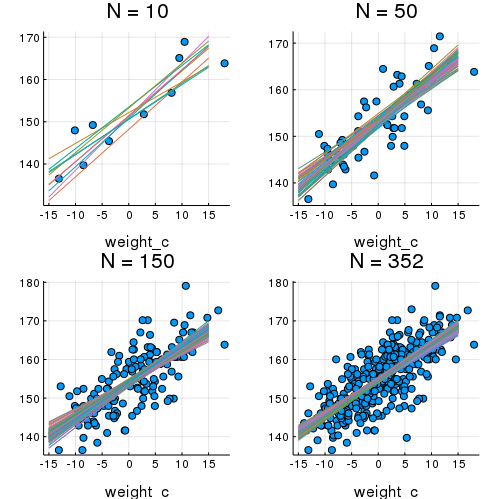

In [10]:
p = Vector{Plots.Plot{Plots.GRBackend}}(undef, 4)
for i in 1:length(nvals)
  N = nvals[i]
  heightsdataN = [
    Dict("N" => N, "height" => df2[1:N, :height], "weight" => df2[1:N, :weight_c])
  ]
  rc, chnN, cnames = stan(stanmodel, heightsdataN, ProjDir, diagnostics=false,
    summary=false, CmdStanDir=CMDSTAN_HOME)

  rws, vars, chns = size(chnN[:, 1, :])
  xi = -15.0:0.1:15.0
  alpha_vals = convert(Vector{Float64}, reshape(chnN.value[:, 1, :], (rws*chns)))
  beta_vals = convert(Vector{Float64}, reshape(chnN.value[:, 2, :], (rws*chns)))

  p[i] = scatter(df2[1:N, :weight_c], df2[1:N, :height], leg=false, xlab="weight_c")
  for j in 1:N
    yi = alpha_vals[j] .+ beta_vals[j]*xi
    plot!(p[i], xi, yi, title="N = $N")
  end
end
plot(p..., layout=(2, 2))

### Snippet 4.50

Get dimensions of chains

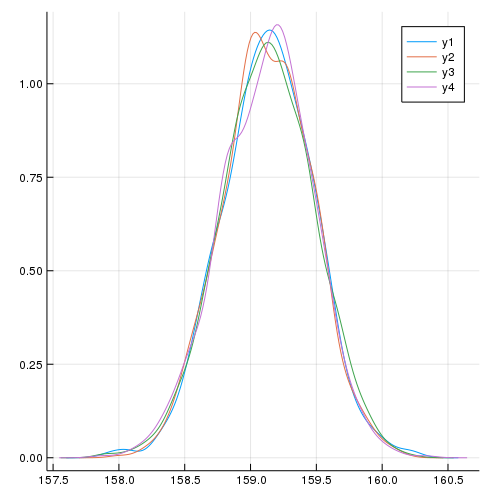

In [11]:
rws, vars, chns = size(chn[:, 1, :])
mu_at_50 = link(50:10:50, chn, [1, 2], mean_weight);
density(mu_at_50)

### Snippet 4.54

Show posterior density for 6 mu_bar values

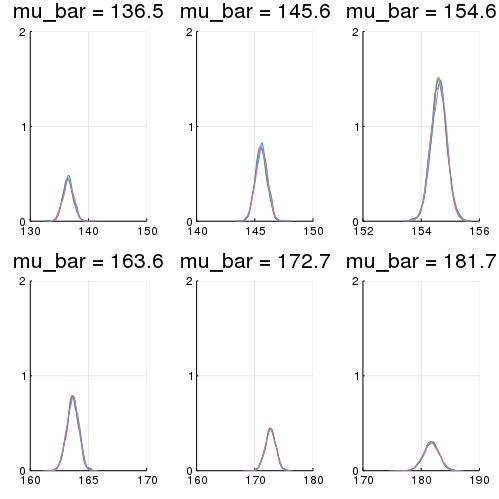

In [12]:
mu = link(25:10:75, chn, [1, 2], mean_weight);

q = Vector{Plots.Plot{Plots.GRBackend}}(undef, size(mu, 1))
for i in 1:size(mu, 1)
  q[i] = density(mu[i], ylim=(0.0, 1.5),
    leg=false, title="mu_bar = $(round(mean(mu[i]), digits=1))")
end

plot(q..., layout=(2, 3), ticks=(3))

End of `clip_48_54s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*